**Задание 1**
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [23]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [24]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [27]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


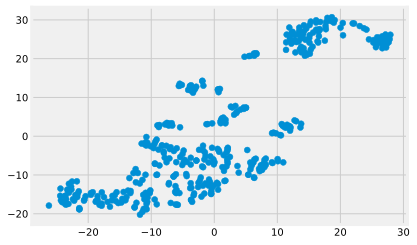

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [29]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(0.5, 1.0, 't-SNE Clustered (Train)')

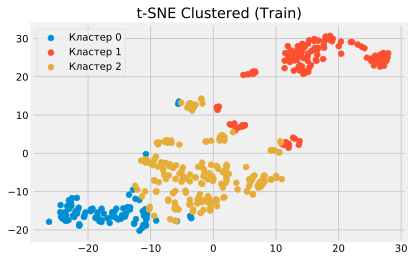

In [39]:
plt.scatter(X_train_tsne[labels_train==0, 0], X_train_tsne[labels_train==0, 1])
plt.scatter(X_train_tsne[labels_train==1, 0], X_train_tsne[labels_train==1, 1])
plt.scatter(X_train_tsne[labels_train==2, 0], X_train_tsne[labels_train==2, 1])
plt.legend(['Кластер 0','Кластер 1','Кластер 2'])
plt.title('t-SNE Clustered (Train)')

In [40]:
print('Средние значения price по кластерам:')
print('          Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('          Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('          Кластер 2: {}'.format(y_train[labels_train == 2].mean()))
#y_train[labels_train == 0].mean(), y_train[labels_train == 1].mean(), y_train[labels_train == 2].mean()

Средние значения price по кластерам:
          Кластер 0: 27.78837209302326
          Кластер 1: 16.165354330708663
          Кластер 2: 24.958115183246072


In [41]:
print('Средние значения CRIM по кластерам:')
print('          Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('          Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('          Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения CRIM по кластерам:
          Кластер 0: 0.07356558139534886
          Кластер 1: 10.797028425196853
          Кластер 2: 0.42166020942408367


**Задание 3 ***

Примените модель KMeans, построенную в предыдущем задании,к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [43]:
test_labels = kmeans.predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_tsne.shape

(102, 2)

Text(0.5, 1.0, 't-SNE Clustered (Test)')

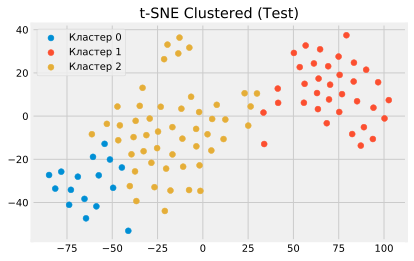

In [46]:
plt.scatter(X_test_tsne[test_labels==0, 0], X_test_tsne[test_labels==0, 1])
plt.scatter(X_test_tsne[test_labels==1, 0], X_test_tsne[test_labels==1, 1])
plt.scatter(X_test_tsne[test_labels==2, 0], X_test_tsne[test_labels==2, 1])
plt.legend(['Кластер 0','Кластер 1','Кластер 2'])
plt.title('t-SNE Clustered (Test)')

In [50]:
print('Средние значения price по кластерам (test):')
print('          Кластер 0: {}'.format(y_test[test_labels == 0].mean()))
print('          Кластер 1: {}'.format(y_test[test_labels == 1].mean()))
print('          Кластер 2: {}'.format(y_test[test_labels == 2].mean()))

Средние значения price по кластерам (test):
          Кластер 0: 31.35
          Кластер 1: 16.43714285714286
          Кластер 2: 21.860784313725492


In [49]:
print('Средние значения CRIM по кластерам (test):')
print('          Кластер 0: {}'.format(X_test.loc[test_labels == 0, 'CRIM'].mean()))
print('          Кластер 1: {}'.format(X_test.loc[test_labels == 1, 'CRIM'].mean()))
print('          Кластер 2: {}'.format(X_test.loc[test_labels == 2, 'CRIM'].mean()))

Средние значения CRIM по кластерам (test):
          Кластер 0: 0.062060000000000004
          Кластер 1: 10.165531142857143
          Кластер 2: 0.26607882352941176
